<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Event-Recommendation-Engine-Challenge" data-toc-modified-id="Event-Recommendation-Engine-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Event Recommendation Engine Challenge</a></span></li><li><span><a href="#数据说明" data-toc-modified-id="数据说明-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据说明</a></span></li><li><span><a href="#工具包" data-toc-modified-id="工具包-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>工具包</a></span></li><li><span><a href="#数据与信息" data-toc-modified-id="数据与信息-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据与信息</a></span></li><li><span><a href="#取出events" data-toc-modified-id="取出events-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>取出events</a></span></li><li><span><a href="#聚类" data-toc-modified-id="聚类-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>聚类</a></span></li><li><span><a href="#总结分析" data-toc-modified-id="总结分析-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>总结分析</a></span></li></ul></div>

# Event Recommendation Engine Challenge

# 数据说明
共有六个文件：train.csv，test.csv， users.csv，user_friends.csv，events.csv和 event_attendees.csv。

**train.csv**  有六列：用户(user)，事件(event)，邀请(invited)，时间戳(timestamp)，感兴趣(interested)和不感兴趣(not_interested)。 
**Test.csv**  包含与train.csv相同的列，没有感兴趣和不感兴趣。  
在我们的应用程序中, 每一行的事件()与用户()是一一对应的。  
**event**  是标识我们系统中的事件的标识。  
**user**  是代表我们系统中的用户的ID。  
**invited**  是一个二进制变量，表示用户是否被邀请参加该活动。      
**timestamp** 是一个ISO-8601 UTC时间字符串，表示当用户在我们的应用程序中看到事件时的大致时间（+/- 2小时）。     
**interested**  是一个二进制变量，用于指示用户是否单击此事件的“感兴趣”按钮; 如果用户点击兴趣，则为1，如果用户没有点击该按钮，则为0。    
**not_interested**  是也一个二进制变量，指示用户是否单击此事件的“不感兴趣”按钮; 如果用户点击该按钮则为1，否则为0。    
有一种可能是用户看到的事件，既不点击 感兴趣，也不点击无兴趣，因此存在 感兴趣，不感兴趣都是0的可能。

users.csv包含我们的一些用户（包括出现在训练集和测试集文件中的所有用户）的人口统计数据，它包含以下列：  user_id，  locale，  birthyear，  gender，  joinedAt，  位置(location)和  时区(timezone)。 
user_id是我们系统中用户的ID。  
locale(环境)是一个表示用户使用环境的字符串，它的格式是 language(语言)_ territory(区域)。
birthyear(出生年份)是代表用户出生年份的4位整数。 
gender(性别)是男性还是女性，取决于用户的性别。  
joinedAt(加入时间)是一个ISO-8601 UTC时间字符串，表示用户第一次使用我们的应用程序的时间。  
location(位置)  是表示用户位置的字符串（如果知道）。
timezone(时区)是一个有符号整数，表示用户的UTC偏移量（以分钟为单位）。

user_friends.csv包含有关此用户的社交数据，并包含两列：user(用户)和friends(朋友)。  
用户是我们系统中的用户ID， 朋友是用户朋友ID的空格分隔列表。

events.csv  包含有关我们系统中事件的数据，共有110列。前九栏是  event_id，user_id，start_time，city，state，zip，country， lat和lng。 
event_id是事件的ID，
user_id  是创建这个事件的用户的ID。  
city(城市)，state(州)，zip(邮政编码)和country(国家)代表关于场地位置的更多细节（如果知道）。  
lat 和lng  是代表场地经纬度坐标的浮点数，四舍五入到小数点后三位。  
start_time 是表示事件计划何时开始的ISO-8601 UTC时间字符串。
最后101列的解读: 首先，我们确定了100个最常见的词干（通过Porter Stemming获得）出现在我们事件的大型随机子集的名称或描述中。最后101列是count_1， count_2，...， count_100， count_other，其中 count_N是一个整数，表示第N个最常用词干出现在该事件的名称或描述中的次数。  count_other 是其余词干不是100个最常见词干之一的词的数量。

event_attendees.csv包含关于哪些用户参加了各种活动的信息，并且具有以下列：  event_id，yes，maybe，invited以及no。
event_id 标识事件。是的，也许， 邀请了，并没有 为用户ID代表用户的空间分隔的名单谁表示，他们打算，也许会，邀请，或不打算事件。

# 工具包

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 数据与信息

In [65]:
#导入数据
dpath = 'E:/AI/00/data/EventRecommendation/'
train = pd.read_csv(dpath+'train.csv')

test  = pd.read_csv(dpath+'test.csv')

In [66]:
train.head()
#train.shape

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [67]:
test.head()
#test.shape

,user,event,invited,timestamp
0,1776192,2877501688,0,2012-11-30 11:39:01.230000+00:00
1,1776192,3025444328,0,2012-11-30 11:39:01.230000+00:00
2,1776192,4078218285,0,2012-11-30 11:39:01.230000+00:00
3,1776192,1024025121,0,2012-11-30 11:39:01.230000+00:00
4,1776192,2972428928,0,2012-11-30 11:39:21.985000+00:00


In [68]:
print(len(train['user'].unique()))
print(len(set(test['user'])))
#event是唯一的, user有重复的, 一个用户可以有多个事件

2034
1357


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15398 entries, 0 to 15397
Data columns (total 6 columns):
user              15398 non-null int64
event             15398 non-null int64
invited           15398 non-null int64
timestamp         15398 non-null object
interested        15398 non-null int64
not_interested    15398 non-null int64
dtypes: int64(5), object(1)
memory usage: 721.9+ KB


没有缺失值, 全部是int64,   
只有 timestamp 是字符型数据
ISO 8601: YYYY-MM-DDTHH:mm:ss.sssZ
       year, month, day, hour, minutes, seconds, milliseconds, zone

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 4 columns):
user         10237 non-null int64
event        10237 non-null int64
invited      10237 non-null int64
timestamp    10237 non-null object
dtypes: int64(3), object(1)
memory usage: 320.0+ KB


# 取出events

In [72]:
# 在train and test 中出现的user(去重)
user_train = set(train.user)
user_test  = set(test.user)
# 在train and test 中出现的events(去重)
event_train = set(train.event)
event_test  = set(test.event)
event_train_test = event_train | event_test

len(event_train_test)
#len(user_train),len(user_test),len(event_train),len(event_test)

13418

In [73]:
events = open(dpath+'events.csv')
# 将指针指向 第二行, (第一行是特征名)
columns=events.readline().strip().split(",")
# 保存列名, 生成DataFrame时使用

In [74]:
# 空列表, 添加对应events
#event_train_df=list()
#event_test_df=list()
event_train_test_df=[]

for line in events:
    cols = line.strip().split(',') 
#    每次读入一行数据, cols[0]='event_id',cols[2]='user_id',(使用时记得int())
#    if int(cols[0]) in event_train: #若读入的event_id在train中出现, 添加入event_train_df
#        event_train_df.append(cols)
#    if int(cols[0]) in event_test:  #若读入的event_id在test中出现, 添加入event_test_df
#        event_test_df.append(cols)
    if int(cols[0]) in event_train_test:  #若读入的event_id在test中出现, 添加入event_test_df
        event_train_test_df.append(cols)

In [75]:
# 有开有关好习惯
events.close()

In [76]:
# 数据量大小
#len(event_train_df), len(event_test_df)
len(event_train_test_df)

13418

In [78]:
# 将取出的数据保存为DataFrame
#event_train = pd.DataFrame(event_train_df,columns=columns)
#event_test  = pd.DataFrame(event_test_df ,columns=columns)
event_train_test = pd.DataFrame(event_train_test_df,columns=columns)

In [79]:
# 将''替换为NaN
event_train_test.replace('',np.nan,inplace=True)
event_train_test.head()

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,1,0,0,0,0,0,0,0,9
1,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,7
2,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,12
3,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,8
4,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,9


In [81]:
event_train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13418 entries, 0 to 13417
Columns: 110 entries, event_id to c_other
dtypes: object(110)
memory usage: 11.3+ MB


In [82]:
# 将抽出的events保存
event_train_test.to_csv(dpath+'event_train_test.csv')

In [83]:
# 删除多余特征
event_train_test.drop(['event_id','user_id','start_time', 'city', 'state', 'zip', 'country', 'lat', 'lng'],axis=1,inplace=True)
event_train_test.head()

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,2,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,9
1,2,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,1,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,1,1,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,9


# 聚类

In [91]:
from sklearn.cluster import KMeans
from sklearn import metrics
import time

In [94]:
# 一个参数点（聚类数据为K）的模型，在校验集上评价聚类算法性能

def K_cluster_analysis(K, X_train):
    start = time.time()
    
    print("K-means begin with clusters: {}".format(K));
    
    #K-means,在训练集上训练
    kmeans = KMeans(n_clusters = K, random_state=66)
    kmeans.fit(X_train)
    
    
    # K值的评估标准
    #常见的方法有轮廓系数Silhouette Coefficient和Calinski-Harabasz Index
    CH_score = metrics.silhouette_score(X_train,kmeans.predict(X_train))
    
    
    end = time.time()
    print("CH_score: {}, time elaps:{}".format(CH_score, int(end-start)))
    
    return CH_score

In [105]:
# 设置超参数（聚类数目K）搜索范围
Ks = range(10,101,10)
CH_scores = []

for K in Ks:
    ch = K_cluster_analysis(K=K, X_train=event_train_test)
    CH_scores.append(ch)

K-means begin with clusters: 10
CH_score: 0.5067026010870587, time elaps:14
K-means begin with clusters: 20
CH_score: 0.34622082250154473, time elaps:15
K-means begin with clusters: 30
CH_score: 0.3053278118913112, time elaps:16
K-means begin with clusters: 40
CH_score: 0.2843276024963295, time elaps:18
K-means begin with clusters: 50
CH_score: 0.24146762638229063, time elaps:18
K-means begin with clusters: 60
CH_score: 0.22819029379817907, time elaps:20
K-means begin with clusters: 70
CH_score: 0.1958739419375072, time elaps:22
K-means begin with clusters: 80
CH_score: 0.16761853798036946, time elaps:24
K-means begin with clusters: 90
CH_score: 0.1620712415142046, time elaps:25
K-means begin with clusters: 100
CH_score: 0.15284565636749964, time elaps:26


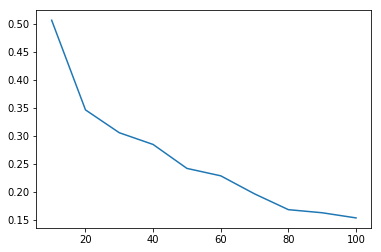

In [106]:
plt.plot(Ks,CH_scores)

**从图中可以看出, 类别数目越多, CH_score越小    
毕竟不同的事件, 最常出现的词干不同** 

In [107]:
# 设置超参数（聚类数目K）, 扩大搜索范围
Ks = range(110,151,10)
CH_scores = []

for K in Ks:
    ch = K_cluster_analysis(K=K, X_train=event_train_test)
    CH_scores.append(ch)

K-means begin with clusters: 110
CH_score: 0.1539346989039163, time elaps:28
K-means begin with clusters: 120
CH_score: 0.1389980012598455, time elaps:28
K-means begin with clusters: 130
CH_score: 0.14080459939097298, time elaps:31
K-means begin with clusters: 140
CH_score: 0.14029117150881584, time elaps:33
K-means begin with clusters: 150
CH_score: 0.12862576653872518, time elaps:36


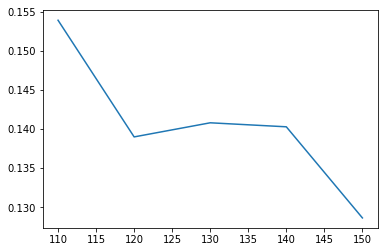

In [108]:
plt.plot(Ks,CH_scores)

**将分类类别扩大到150仍然是下降趋势**

In [109]:
K_cluster_analysis(K=300, X_train=event_train_test)

K-means begin with clusters: 300
CH_score: 0.11582691625710592, time elaps:62


0.11582691625710592

# 总结分析

**将分类类别扩大到300,CH_score= 0.11582691625710592    
而分类类别为150时, CH_score= 0.12862576653872518    
此时的CH_score相差并没有那么大了**

**相对应的n_clusters应该在150到200之间**